In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab    
import json
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
import powerlaw

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;


In [4]:
business=pd.read_csv('yelp_academic_dataset_business.csv')

/Users/Wendy/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,4,7,17,26,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
new=[]
for index, columns in business.iterrows():
    new_categories = str(columns['categories']).lower()
    Id = columns['business_id']
    City = columns['city']
    Stars = columns['stars']
    State = columns['state']
    Review = columns['review_count']
    
    if "restaurant" in new_categories:
         new.append({"categories":new_categories,"business_id":Id,"state":State,"city":City,"stars":Stars})
        

In [6]:
business_restaurant=pd.DataFrame(new)

In [7]:
feature=['business_id','attributes.Noise Level','attributes.Wi-Fi','attributes.Price Range',
        'attributes.Good for Kids','attributes.Waiter Service','attributes.Take-out','attributes.Outdoor Seating','attributes.Parking.lot','attributes.Parking.street',
        'attributes.Parking.garage','attributes.Parking.valet','attributes.Parking.validated','attributes.Good For.dessert','attributes.Good For.latenight','attributes.Good For.brunch',
        'attributes.Good For.lunch','attributes.Good For.dinner','attributes.Good For.breakfast']
business_df=business[feature]
business_df.head()

,business_id,attributes.Noise Level,attributes.Wi-Fi,attributes.Price Range,attributes.Good for Kids,attributes.Waiter Service,attributes.Take-out,attributes.Outdoor Seating,attributes.Parking.lot,attributes.Parking.street,attributes.Parking.garage,attributes.Parking.valet,attributes.Parking.validated,attributes.Good For.dessert,attributes.Good For.latenight,attributes.Good For.brunch,attributes.Good For.lunch,attributes.Good For.dinner,attributes.Good For.breakfast
0,5UmKMjUEUNdYWqANhGckJw,average,NaN,1.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,UsFtqoBl7naz8AVUBZMjQQ,NaN,NaN,1.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cE27W9VPgO88Qxe4ol6y_g,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mVHrayjG3uZ_RLHkLj-AMg,average,no,2.0,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False
4,mYSpR_SLPgUVymYOvTQd_Q,NaN,NaN,NaN,True,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
business_one=pd.merge(business_restaurant,business_df,on='business_id') 
business_one.columns = ["business_id","categories","city","stars","state","Noise",
                       "Wi-Fi","Price","Kids","Waiter","Take-out","Outdoor-Seating","lot","street",
                       "garage","valet","validated",'dessert','latenight','brunch','lunch',
                       'dinner','breakfast']
business_one.head()

,business_id,categories,city,stars,state,Noise,Wi-Fi,Price,Kids,Waiter,...,street,garage,valet,validated,dessert,latenight,brunch,lunch,dinner,breakfast
0,5UmKMjUEUNdYWqANhGckJw,"['fast food', 'restaurants']",Dravosburg,3.5,PA,average,NaN,1.0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,mVHrayjG3uZ_RLHkLj-AMg,"['bars', 'american (new)', 'nightlife', 'loung...",Braddock,4.5,PA,average,no,2.0,True,True,...,False,False,False,False,False,False,False,True,False,False
2,KayYbHCt-RkbGcPdGOThNg,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,loud,free,1.0,False,True,...,False,False,False,False,False,False,False,False,True,False
3,wJr6kSA5dchdgOdwH6dZ2w,"['burgers', 'breakfast & brunch', 'american (t...",Carnegie,3.5,PA,NaN,NaN,1.0,True,True,...,False,False,False,False,False,False,False,False,False,False
4,fNGIbpazjTRdXgwRY_NIXA,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,average,free,1.0,True,True,...,False,False,False,False,False,False,False,False,False,False


In [9]:
business_two = business_one.dropna()

In [10]:
# business_two = business_two[business_two.city=="Las Vegas"]
# business_two.head()

In [11]:
# business_two = business_two.drop(['divey','classy','touristy','hipster','trendy',
#                         'intimate','casual','romantic','upscale'],axis=1)

### Define Parking Level

In [12]:
def get_park(park):
    lot,street,garage,valet,validated = park
    return True if lot+street+garage+valet+validated > 0 else False
def get_park_level(park):
    lot,street,garage,valet,validated = park
    return lot+street+garage+valet+validated 
def get_good_level(good):
    dessert,latenight,brunch,lunch,dinner,breakfast= good
    return dessert+latenight+brunch+lunch+dinner+breakfast 

business_two['parking'] = business_two[['lot','street','garage','valet','validated']].apply(get_park,axis=1)
business_two['park_level'] = business_two[['lot','street','garage','valet','validated']].apply(get_park_level,axis=1)
business_two['good_level'] = business_two [['dessert','latenight','brunch','lunch','dinner','breakfast']].apply(get_good_level,axis=1)

/Users/Wendy/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Wendy/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Wendy/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [13]:
business_three = business_two.drop(['lot','street','garage','valet','validated','dessert','latenight','brunch','lunch','dinner','breakfast'],axis=1)

In [14]:
restaurant = business_three
restaurant.head()

,business_id,categories,city,stars,state,Noise,Wi-Fi,Price,Kids,Waiter,Take-out,Outdoor-Seating,parking,park_level,good_level
1,mVHrayjG3uZ_RLHkLj-AMg,"['bars', 'american (new)', 'nightlife', 'loung...",Braddock,4.5,PA,average,no,2.0,True,True,True,False,False,0,1
2,KayYbHCt-RkbGcPdGOThNg,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,loud,free,1.0,False,True,True,True,True,1,1
4,fNGIbpazjTRdXgwRY_NIXA,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,average,free,1.0,True,True,True,False,True,1,0
5,b9WZJp5L1RZr4F1nxclOoQ,"['breakfast & brunch', 'sandwiches', 'restaura...",Carnegie,4.5,PA,average,no,1.0,True,True,True,False,True,1,1
11,wqu7ILomIOPSduRwoWp4AQ,"['breakfast & brunch', 'american (traditional)...",Pittsburgh,3.5,PA,average,no,1.0,True,True,True,False,False,0,1


### Define High and Low

In [15]:
def group_stars(value):
    if value <=3.5:
        return 0
    else:
        return 1

restaurant['stars'] = restaurant['stars'].apply(group_stars)


In [16]:
restaurant.stars.value_counts().sort_index()

0    9135
1    6716
Name: stars, dtype: int64

### Define Noise

In [17]:
def new_noise(value):
    if value == "quiet":
        return 0
    elif value =="average":
        return 1
    elif value == "loud":
        return 2
    else:
        return 3
restaurant["Noise"] = restaurant["Noise"].apply(new_noise)
restaurant.head()

,business_id,categories,city,stars,state,Noise,Wi-Fi,Price,Kids,Waiter,Take-out,Outdoor-Seating,parking,park_level,good_level
1,mVHrayjG3uZ_RLHkLj-AMg,"['bars', 'american (new)', 'nightlife', 'loung...",Braddock,1,PA,1,no,2.0,True,True,True,False,False,0,1
2,KayYbHCt-RkbGcPdGOThNg,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,1,PA,2,free,1.0,False,True,True,True,True,1,1
4,fNGIbpazjTRdXgwRY_NIXA,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,1,PA,1,free,1.0,True,True,True,False,True,1,0
5,b9WZJp5L1RZr4F1nxclOoQ,"['breakfast & brunch', 'sandwiches', 'restaura...",Carnegie,1,PA,1,no,1.0,True,True,True,False,True,1,1
11,wqu7ILomIOPSduRwoWp4AQ,"['breakfast & brunch', 'american (traditional)...",Pittsburgh,0,PA,1,no,1.0,True,True,True,False,False,0,1


In [18]:
restaurant[['Noise', 'stars']].groupby(['Noise'], as_index=False).mean().sort_values(by='stars', ascending=False)

,Noise,stars
0,0,0.485623
1,1,0.431254
2,2,0.272973
3,3,0.125668


### Define Wi-Fi

In [19]:
def new_wifi(value):
    if value == "no":
        return 1
    elif value =="paid":
        return 0
    else:
        return 2
    
restaurant["Wi-Fi"] = restaurant["Wi-Fi"].apply(new_wifi)

In [20]:
restaurant[['Wi-Fi', 'stars']].groupby(['Wi-Fi'], as_index=False).mean().sort_values(by='stars', ascending=False)

,Wi-Fi,stars
2,2,0.446746
1,1,0.410609
0,0,0.198276


### Define Good Level

In [21]:
restaurant
restaurant[['good_level', 'stars']].groupby(['good_level'], as_index=False).mean().sort_values(by='stars', ascending=False)

,good_level,stars
1,1,0.448811
2,2,0.384110
0,0,0.353179
3,3,0.297959
4,4,0.289474
5,5,0.000000


In [22]:
restaurant
restaurant[['parking', 'stars']].groupby(['parking'], as_index=False).mean().sort_values(by='stars', ascending=False)

,parking,stars
1,True,0.447360
0,False,0.335422


In [23]:
restaurant.head()

,business_id,categories,city,stars,state,Noise,Wi-Fi,Price,Kids,Waiter,Take-out,Outdoor-Seating,parking,park_level,good_level
1,mVHrayjG3uZ_RLHkLj-AMg,"['bars', 'american (new)', 'nightlife', 'loung...",Braddock,1,PA,1,1,2.0,True,True,True,False,False,0,1
2,KayYbHCt-RkbGcPdGOThNg,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,1,PA,2,2,1.0,False,True,True,True,True,1,1
4,fNGIbpazjTRdXgwRY_NIXA,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,1,PA,1,2,1.0,True,True,True,False,True,1,0
5,b9WZJp5L1RZr4F1nxclOoQ,"['breakfast & brunch', 'sandwiches', 'restaura...",Carnegie,1,PA,1,1,1.0,True,True,True,False,True,1,1
11,wqu7ILomIOPSduRwoWp4AQ,"['breakfast & brunch', 'american (traditional)...",Pittsburgh,0,PA,1,1,1.0,True,True,True,False,False,0,1


### Correlation

In [24]:
restaurant_1 = restaurant[restaurant.city=='Las Vegas']
restaurant_las = restaurant_1.drop(["business_id","categories","city","state","parking"],axis=1)
restaurant_2 = restaurant[restaurant.city=='Edinburgh']
restaurant_ed = restaurant_2.drop(["business_id","categories","city","state","parking"],axis=1)


# new_restaurant = restaurant.drop(["business_id","categories","city","state","parking"],axis=1)


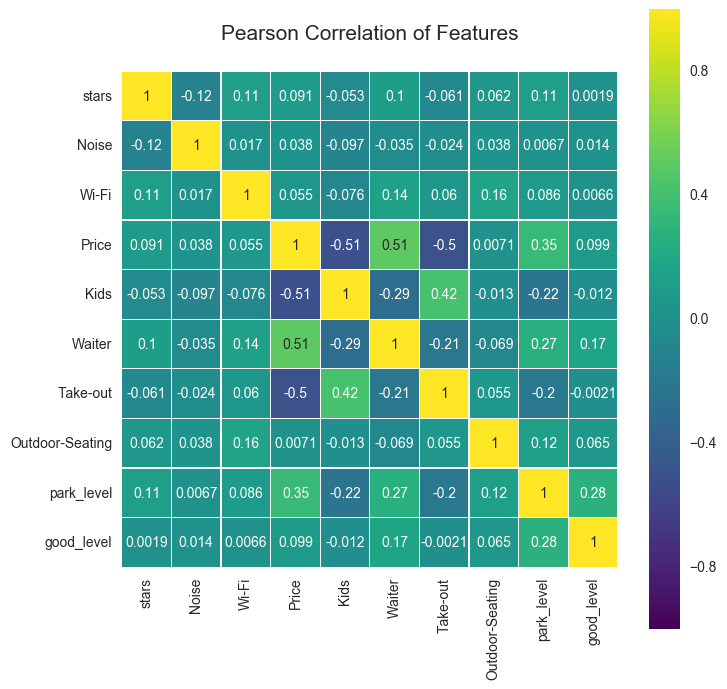

In [25]:
colormap = plt.cm.viridis
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(restaurant_las.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Define x_train and y_train

In [32]:
X_train_las = restaurant_las.drop(["stars"],axis=1)
Y_train_las = restaurant_las["stars"].ravel()
X_train_ed = restaurant_ed.drop(["stars"],axis=1)
Y_train_ed = restaurant_ed["stars"].ravel()


In [33]:
random_forest_las = RandomForestClassifier(n_estimators=100)
random_forest_las.fit(X_train_las, Y_train_las)
random_forest_las.score(X_train_las, Y_train_las)

acc_random_forest_las = round(random_forest_las.score(X_train_las, Y_train_las) * 100, 2)
acc_random_forest_las

67.900000000000006

In [34]:
random_forest_ed = RandomForestClassifier(n_estimators=100)
random_forest_ed.fit(X_train_ed, Y_train_ed)
random_forest_ed.score(X_train_ed, Y_train_ed)

acc_random_forest_ed = round(random_forest_ed.score(X_train_ed, Y_train_ed) * 100, 2)
acc_random_forest_ed


89.760000000000005

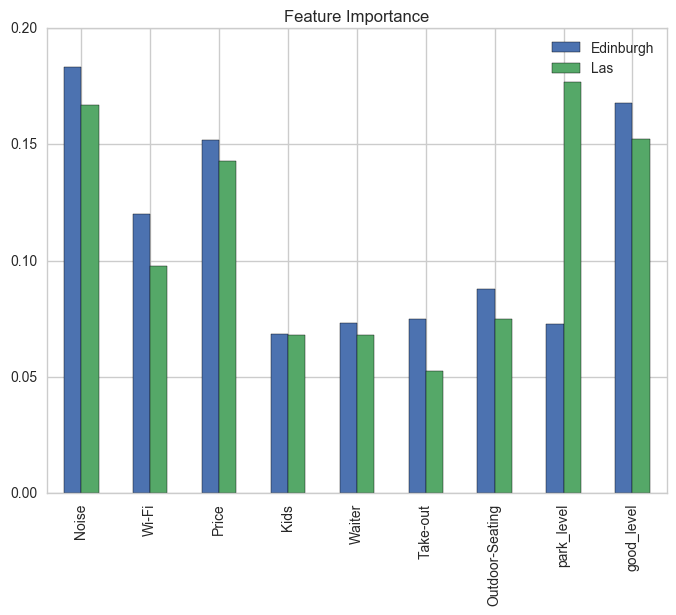

In [50]:
importances_las = random_forest_las.feature_importances_
importances_ed = random_forest_ed.feature_importances_

results={}
names=X_train_las.columns.values
results["Las"] = random_forest_las.feature_importances_
results["Edinburgh"] = random_forest_ed.feature_importances_
# results["Mera"] = random_forest_ed.feature_importances_

# results=result.T

results = pd.DataFrame.from_dict(results,orient='index')
results.columns=names
results = results.T
results.plot(kind="bar",title="Feature Importance",figsize=(8, 6))
axes = plt.gca()
# axes.set_ylim([0,1])

# results